This notebook is the continuation of project 7. Answering the two remaining questions and application of Random Forest Regressor

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in the data
data= pd.read_csv('/content/data_cleaned.csv')

In [3]:
data.head()

,property_type,room_type,amenities,neighbourhood,bed_type,cancellation_policy,city,description,host_has_profile_pic,host_identity_verified,...,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,bedrooms,beds
0,0,0,6043,76,4,2,4,9844,1,1,...,6901257,5.010635,3,1,1,40.696524,-73.991617,2,1,1
1,0,0,6169,251,4,2,4,18779,1,0,...,6304928,5.129899,7,1,1,40.766115,-73.989040,6,3,3
2,0,0,21029,246,4,1,4,54739,1,1,...,7919400,4.976734,5,1,1,40.808110,-73.943756,10,1,3
3,17,0,38328,324,4,0,5,62090,1,1,...,13418779,6.620073,4,1,1,37.772004,-122.431619,0,2,2
4,0,0,54537,118,4,1,2,15731,1,1,...,3808709,4.744932,2,1,1,38.925627,-77.034596,4,0,1


In [4]:
data.shape

(72959, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72959 entries, 0 to 72958
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           72959 non-null  int64  
 1   room_type               72959 non-null  int64  
 2   amenities               72959 non-null  int64  
 3   neighbourhood           72959 non-null  int64  
 4   bed_type                72959 non-null  int64  
 5   cancellation_policy     72959 non-null  int64  
 6   city                    72959 non-null  int64  
 7   description             72959 non-null  int64  
 8   host_has_profile_pic    72959 non-null  int64  
 9   host_identity_verified  72959 non-null  int64  
 10  host_since              72959 non-null  int64  
 11  instant_bookable        72959 non-null  int64  
 12  name                    72959 non-null  int64  
 13  zipcode                 72959 non-null  int64  
 14  id                      72959 non-null

Observe that our data is now in integer form so it is ready for being fitted into our ML model

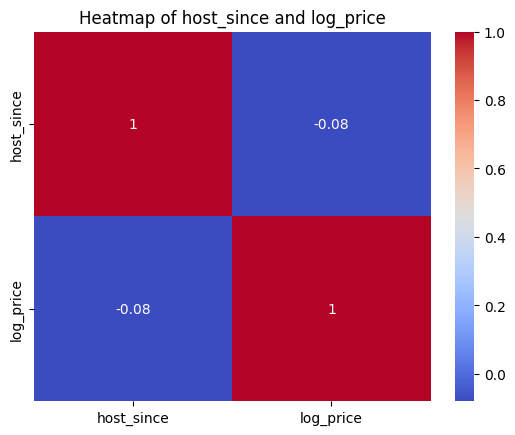

In [8]:
# 2. How does seasonality affect rental prices?
# Heatmat of host_since and log_price
sns.heatmap(data[['host_since', 'log_price']].corr(), cmap='coolwarm', annot = True)
plt.title('Heatmap of host_since and log_price')
plt.show()

Observe the negative correlation between host_seasonality and Log_price. This means that increase in host_seasonality result n a drecrease in log_price

Random Forest Regression Model. Can we build a model to recommend optimal pricing.

In [9]:
# Imports for model training and selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
# Create a function to evaluate model
def evaluate_model(true, predicted):
  mse = mean_squared_error(true, predicted)
  rmse = np.sqrt(mean_absolute_error(true, predicted))
  mae = mean_absolute_error(true, predicted)
  r2_squared = r2_score(true, predicted)
  print('MSE:', mse)
  print('RMSE:', rmse)
  print('MAE:', mae)
  print('R2 Squared:', r2_squared)

In [12]:
# Model Training
model = RandomForestRegressor()
# Splitting the data into x and y
X = data.drop(['log_price'], axis=1)
y = data['log_price']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Fit the model
model.fit(X_train, y_train)
# Predict the model
y_pred = model.predict(X_test)
# Evaluate the model
evaluate_model(y_test, y_pred)

MSE: 0.15659382340033012
RMSE: 0.5338810988154489
MAE: 0.2850290276723911
R2 Squared: 0.7010237486381758


We have our model with accuracy of 0.7